# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from random import randint

# Data Set Up

In [2]:
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/images.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/labels.csv"
image_data = np.load('images.npy',allow_pickle=True)
labels = pd.read_csv('labels.csv')

images.npy          100%[===================>]   1.06G   142MB/s    in 7.5s    
labels.csv          100%[===================>]  74.51K  --.-KB/s    in 0.001s  


In [3]:
labels.isnull().sum()

Unnamed: 0        0
author           32
clean_title      56
created_utc       0
domain          199
num_comments    199
score             0
subreddit         0
title            55
upvote_ratio    199
2_way_label       0
3_way_label       0
6_way_label       0
dtype: int64

In [4]:
labels.shape

(521, 13)

In [5]:
image_data.shape

(521,)

In [6]:
title_data = labels[['clean_title', '2_way_label', '3_way_label', '6_way_label']].dropna()

In [7]:
map_2 = ['Fake', 'True']
map_3 = ['True', 'Fake with True Text', 'Fake with False Text']
map_6 = ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']

In [8]:
all_train = pd.read_csv('/content/drive/MyDrive/Data Science/Fakeddit/all_train.tsv', sep='\t')
all_train = all_train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'id', 'linked_submission_id', 'hasImage', 'image_url', 'author'])
full_data = all_train.dropna()

# Checking Classes

testing label map

In [10]:
labels['2_way_label'].map({0: 'Fake', 1: 'True'})

0      True
1      Fake
2      Fake
3      Fake
4      Fake
       ... 
516    True
517    True
518    Fake
519    Fake
520    Fake
Name: 2_way_label, Length: 521, dtype: object

Index: 480
Title: my puppy is changing his teeth but the baby ones didnt fall yet he looks like a sharkdog or something
2 way Label: 1
3 way Label: 0
6 way Label: 0


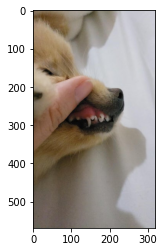

In [ ]:
index_val = randint(0,521)
plt.imshow(image_data[index_val])
print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 way Label:', labels['2_way_label'][index_val])
print('3 way Label:', labels['3_way_label'][index_val])
print('6 way Label:', labels['6_way_label'][index_val])

Index: 171
Title: russia intervened to promote trump us intelligence
2 way Label: 1
3 way Label: 0
6 way Label: 0


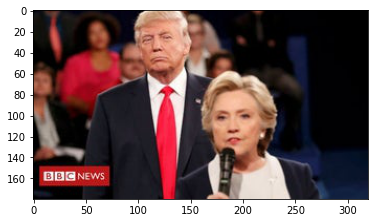

In [ ]:
index_val = randint(0,521)
plt.imshow(image_data[index_val])
print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 way Label:', labels['2_way_label'][index_val])
print('3 way Label:', labels['3_way_label'][index_val])
print('6 way Label:', labels['6_way_label'][index_val])

Index: 106
Title: this alcoholic bottle has a magnifying glass so you can see the name
2 way Label: 1
3 way Label: 0
6 way Label: 0


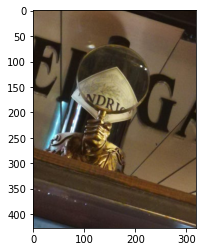

In [ ]:
index_val = randint(0,521)
plt.imshow(image_data[index_val])
print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 way Label:', labels['2_way_label'][index_val])
print('3 way Label:', labels['3_way_label'][index_val])
print('6 way Label:', labels['6_way_label'][index_val])

Index: 493
Title: obligatory
2 way Label: 0
3 way Label: 2
6 way Label: 4


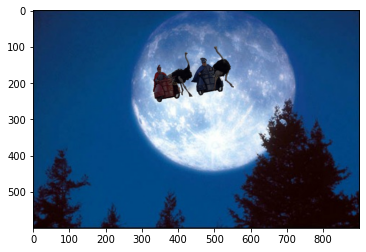

In [ ]:
index_val = randint(0,521)
plt.imshow(image_data[index_val])
print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 way Label:', labels['2_way_label'][index_val])
print('3 way Label:', labels['3_way_label'][index_val])
print('6 way Label:', labels['6_way_label'][index_val])

# Metadata Visualizations

In [ ]:
labels.columns

Index(['Unnamed: 0', 'author', 'clean_title', 'created_utc', 'domain',
       'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio',
       '2_way_label', '3_way_label', '6_way_label'],
      dtype='object')

In [ ]:
labels.shape

(521, 13)

In [ ]:
len(labels.columns)

13

In [ ]:
full_data.columns

Index(['clean_title', 'created_utc', 'domain', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')

In [ ]:
full_data.shape

(634932, 11)

In [ ]:
len(full_data.columns)

11

## Created UTC

In [11]:
full_data.head()

clean_title   created_utc  \
0  my walgreens offbrand mucinex was engraved wit...  1.551641e+09   
2                this concerned sink with a tiny hat  1.534727e+09   
3      hackers leak emails from uae ambassador to us  1.496511e+09   
5                     this flower in my neighborhood  1.557764e+09   
6                           puppy taking in the view  1.471341e+09   

          domain  num_comments  score          subreddit  \
0    i.imgur.com           2.0     12  mildlyinteresting   
2      i.redd.it           2.0    119         pareidolia   
3  aljazeera.com           1.0     44        neutralnews   
5      i.redd.it           0.0     17  mildlyinteresting   
6    i.imgur.com          26.0    250   photoshopbattles   

                                               title  upvote_ratio  \
0  My Walgreens offbrand Mucinex was engraved wit...          0.84   
2                This concerned sink with a tiny hat          0.99   
3      Hackers leak emails from UAE ambassador to US          0.92   
5                     This flower in my neighborhood          0.92   
6                 PsBattle: Puppy taking in the view          0.95   

   2_way_label  3_way_label  6_way_label  
0            1            0            0  
2            0            2            2  
3            1            0            0  
5            1            0            0  
6            1            0            0

In [14]:
timestamps = pd.to_datetime(full_data['created_utc'], unit='s')

In [15]:
full_data.loc[:, 'timestamp'] = timestamps

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [19]:
full_data.groupby(full_data.timestamp.dt.year)['2_way_label'].mean()

timestamp
2008    0.979167
2009    0.981818
2010    0.681081
2011    0.168175
2012    0.656571
2013    0.743890
2014    0.771726
2015    0.739614
2016    0.649059
2017    0.531468
2018    0.462061
2019    0.680962
Name: 2_way_label, dtype: float64

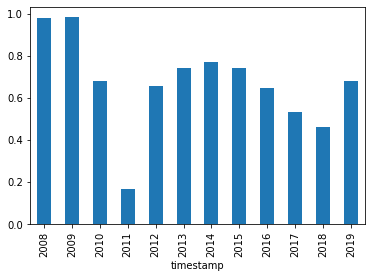

In [18]:
full_data.groupby(full_data.timestamp.dt.year)['2_way_label'].mean().plot(kind='bar')

In [23]:
time_counts_3_way_label = full_data.groupby(full_data.timestamp.dt.year)['3_way_label'].value_counts().rename('counts').reset_index()

In [24]:
time_counts_3_way_label

timestamp  3_way_label  counts
0        2008            0      47
1        2008            2       1
2        2009            0     162
3        2009            2       3
4        2010            0     126
5        2010            2      59
6        2011            2     612
7        2011            1     491
8        2011            0     223
9        2012            0    8173
10       2012            2    3132
11       2012            1    1143
12       2013            0   23376
13       2013            2    6678
14       2013            1    1370
15       2014            0   34277
16       2014            2    8551
17       2014            1    1588
18       2015            0   43672
19       2015            2   13639
20       2015            1    1736
21       2016            0   45316
22       2016            2   22224
23       2016            1    2278
24       2017            0   49435
25       2017            2   41474
26       2017            1    2107
27       2018            2   57686
28       2018            0   51737
29       2018            1    2547
30       2019            0  143730
31       2019            2   64282
32       2019            1    3057

In [25]:
pivot_df = time_counts_3_way_label.pivot(index='timestamp', columns='3_way_label', values='counts').fillna(0)
pivot_df

3_way_label         0       1        2
timestamp                             
2008             47.0     0.0      1.0
2009            162.0     0.0      3.0
2010            126.0     0.0     59.0
2011            223.0   491.0    612.0
2012           8173.0  1143.0   3132.0
2013          23376.0  1370.0   6678.0
2014          34277.0  1588.0   8551.0
2015          43672.0  1736.0  13639.0
2016          45316.0  2278.0  22224.0
2017          49435.0  2107.0  41474.0
2018          51737.0  2547.0  57686.0
2019         143730.0  3057.0  64282.0

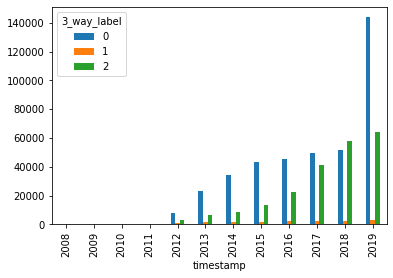

In [26]:
pivot_df.plot(kind='bar')

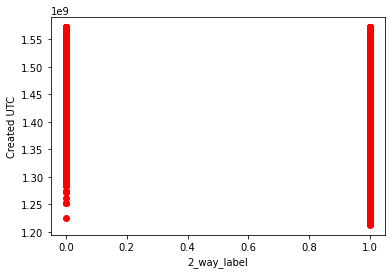

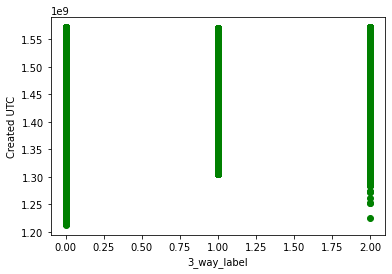

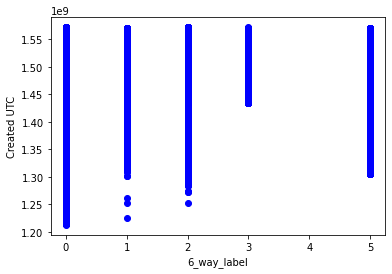

['Fake', 'True'] 
 ['True', 'Fake with True Text', 'Fake with False Text'] 
 ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']


In [ ]:
plt.figure()
plt.scatter(full_data['2_way_label'], full_data['created_utc'], color='red')
plt.xlabel('2_way_label')
plt.ylabel('Created UTC')
plt.show()

plt.figure()
plt.scatter(full_data['3_way_label'], full_data['created_utc'], color='green')
plt.xlabel('3_way_label')
plt.ylabel('Created UTC')
plt.show()

plt.figure()
plt.scatter(full_data['6_way_label'], full_data['created_utc'], color='blue')
plt.xlabel('6_way_label')
plt.ylabel('Created UTC')
plt.show()

print(map_2, '\n', map_3, '\n', map_6)

## Number of Comments

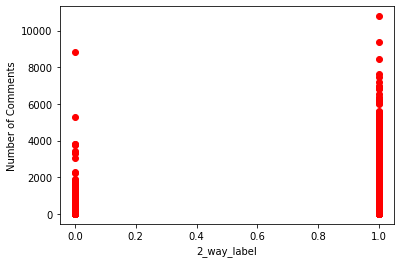

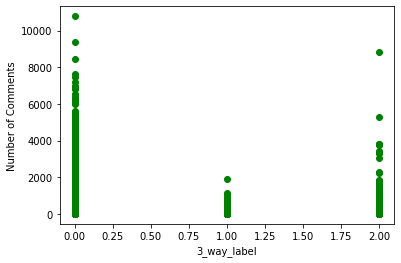

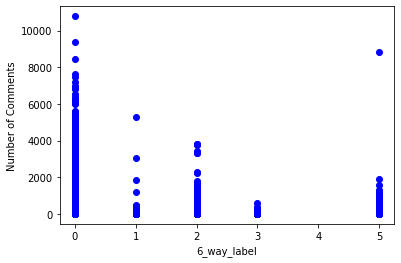

['Fake', 'True'] 
 ['True', 'Fake with True Text', 'Fake with False Text'] 
 ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']


In [ ]:
plt.figure()
plt.scatter(full_data['2_way_label'], full_data['num_comments'], color='red')
plt.xlabel('2_way_label')
plt.ylabel('Number of Comments')
plt.show()

plt.figure()
plt.scatter(full_data['3_way_label'], full_data['num_comments'], color='green')
plt.xlabel('3_way_label')
plt.ylabel('Number of Comments')
plt.show()

plt.figure()
plt.scatter(full_data['6_way_label'], full_data['num_comments'], color='blue')
plt.xlabel('6_way_label')
plt.ylabel('Number of Comments')
plt.show()
print(map_2, '\n', map_3, '\n', map_6)

## Score

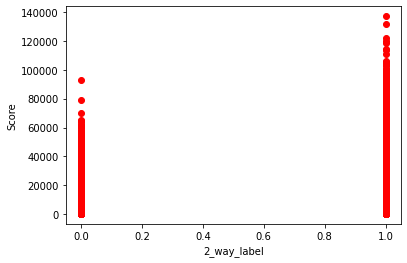

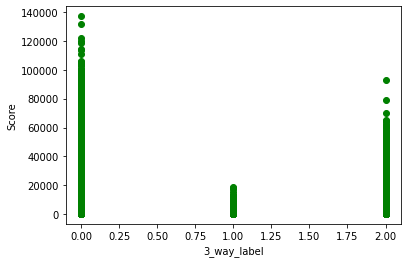

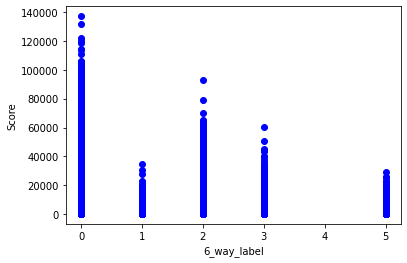

['Fake', 'True'] 
 ['True', 'Fake with True Text', 'Fake with False Text'] 
 ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']


In [ ]:
plt.figure()
plt.scatter(full_data['2_way_label'], full_data['score'], color='red')
plt.xlabel('2_way_label')
plt.ylabel('Score')
plt.show()

plt.figure()
plt.scatter(full_data['3_way_label'], full_data['score'], color='green')
plt.xlabel('3_way_label')
plt.ylabel('Score')
plt.show()

plt.figure()
plt.scatter(full_data['6_way_label'], full_data['score'], color='blue')
plt.xlabel('6_way_label')
plt.ylabel('Score')
plt.show()

print(map_2, '\n', map_3, '\n', map_6)

## Upvote Ratio

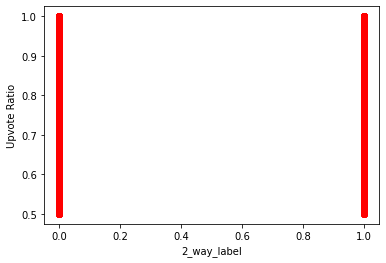

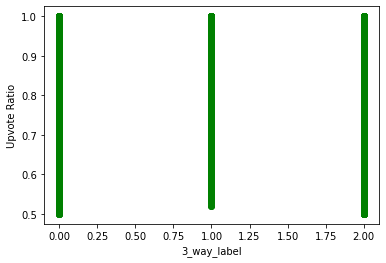

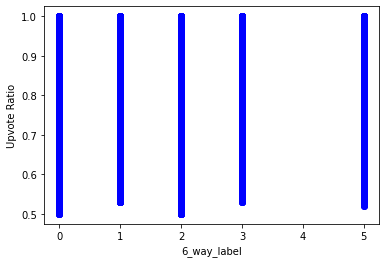

['Fake', 'True'] 
 ['True', 'Fake with True Text', 'Fake with False Text'] 
 ['True', 'Satire', 'Misleading Content', 'Manipulated Content', 'False Connection', 'Imposter Cotent']


In [ ]:
plt.figure()
plt.scatter(full_data['2_way_label'], full_data['upvote_ratio'], color='red')
plt.xlabel('2_way_label')
plt.ylabel('Upvote Ratio')
plt.show()

plt.figure()
plt.scatter(full_data['3_way_label'], full_data['upvote_ratio'], color='green')
plt.xlabel('3_way_label')
plt.ylabel('Upvote Ratio')
plt.show()

plt.figure()
plt.scatter(full_data['6_way_label'], full_data['upvote_ratio'], color='blue')
plt.xlabel('6_way_label')
plt.ylabel('Upvote Ratio')
plt.show()

print(map_2, '\n', map_3, '\n', map_6)

## Subreddit

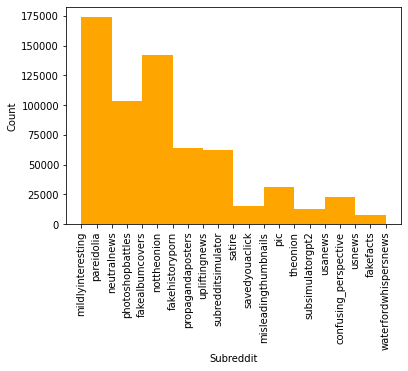

In [ ]:
plt.figure()
plt.hist(full_data['subreddit'], color='orange')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

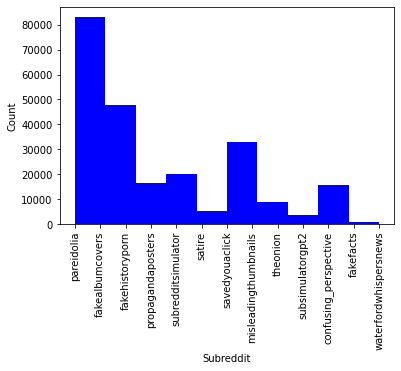

In [ ]:
plt.figure()
plt.hist(full_data[full_data['2_way_label']==0]['subreddit'], color='blue')
plt.xlabel('Subreddit')
plt.ylabel('Num')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

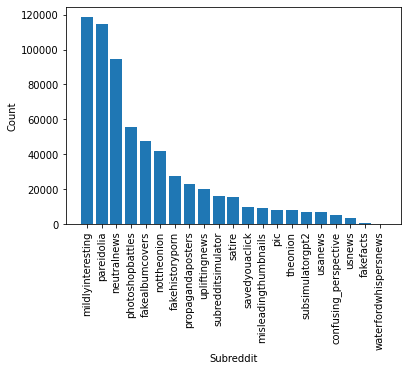

In [ ]:
plt.bar(full_data['subreddit'].unique(), full_data['subreddit'].value_counts(), 0.8, label = 'Counts')

plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

In [ ]:
label2_0=[]
label2_1=[]

for sub in full_data['subreddit'].unique():
  label2_0.append((full_data[full_data['2_way_label']==0]['subreddit']==sub).sum())
  label2_1.append((full_data[full_data['2_way_label']==1]['subreddit']==sub).sum())

In [ ]:
len(label2_0)

21

In [ ]:
len(label2_1)

21

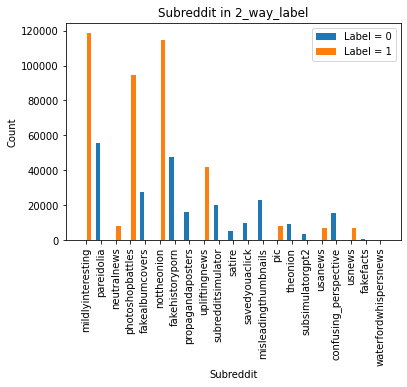

In [ ]:
X_axis = np.arange(len(full_data['subreddit'].unique()))

plt.bar(X_axis-0.2, label2_0, 0.3, label = 'Label = 0')
plt.bar(X_axis+0.2, label2_1, 0.3, label = 'Label = 1')

plt.xticks(X_axis, full_data['subreddit'].unique())
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title("Subreddit in 2_way_label")
plt.legend()
plt.xticks(rotation=90)

plt.show()

In [31]:
full_data.groupby('subreddit')['2_way_label'].value_counts()

subreddit              2_way_label
confusing_perspective  0               15818
fakealbumcovers        0               27612
fakefacts              0                 428
fakehistoryporn        0               47750
mildlyinteresting      1              118592
misleadingthumbnails   0               22973
neutralnews            1                8312
nottheonion            1              114449
pareidolia             0               55424
photoshopbattles       1               94785
pic                    1                8370
propagandaposters      0               16317
satire                 0                5353
savedyouaclick         0                9826
subredditsimulator     0               20253
subsimulatorgpt2       0                3559
theonion               0                8982
upliftingnews          1               41820
usanews                1                7023
usnews                 1                6923
waterfordwhispersnews  0                 363
Name: 2_way_label, d

In [28]:
full_data.groupby('subreddit')['3_way_label'].value_counts()

subreddit              3_way_label
confusing_perspective  2               15818
fakealbumcovers        2               27612
fakefacts              2                 428
fakehistoryporn        2               47750
mildlyinteresting      0              118592
misleadingthumbnails   2               22973
neutralnews            0                8312
nottheonion            0              114449
pareidolia             2               55424
photoshopbattles       0               94785
pic                    0                8370
propagandaposters      1               16317
satire                 2                5353
savedyouaclick         2                9826
subredditsimulator     2               20253
subsimulatorgpt2       2                3559
theonion               2                8982
upliftingnews          0               41820
usanews                0                7023
usnews                 0                6923
waterfordwhispersnews  2                 363
Name: 3_way_label, d

In [29]:
full_data.groupby('subreddit')['6_way_label'].value_counts()

subreddit              6_way_label
confusing_perspective  2               15818
fakealbumcovers        1               27612
fakefacts              5                 428
fakehistoryporn        2               47750
mildlyinteresting      0              118592
misleadingthumbnails   2               22973
neutralnews            0                8312
nottheonion            0              114449
pareidolia             2               55424
photoshopbattles       0               94785
pic                    0                8370
propagandaposters      5               16317
satire                 1                5353
savedyouaclick         5                9826
subredditsimulator     3               20253
subsimulatorgpt2       3                3559
theonion               1                8982
upliftingnews          0               41820
usanews                0                7023
usnews                 0                6923
waterfordwhispersnews  1                 363
Name: 6_way_label, d

## Relations

In [ ]:
full_data.columns

Index(['clean_title', 'created_utc', 'domain', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')

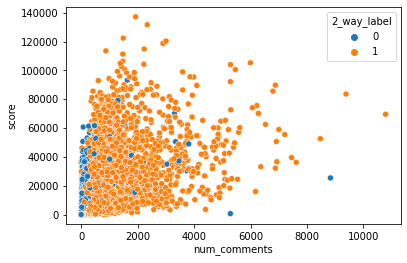

In [ ]:
sns.scatterplot(data=full_data, x='num_comments', y='score', hue='2_way_label')

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


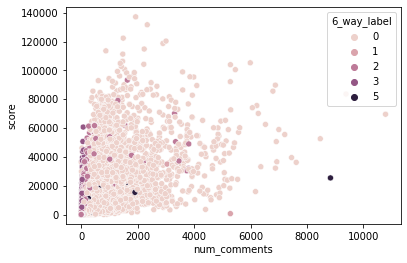

In [ ]:
sns.scatterplot(data=full_data, x='num_comments', y='score', hue='6_way_label')

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


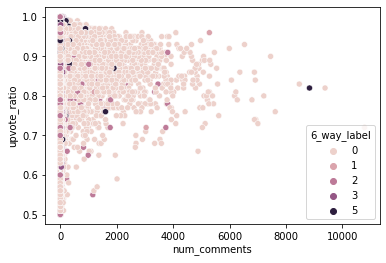

In [ ]:
sns.scatterplot(data=full_data, x='num_comments', y='upvote_ratio', hue='6_way_label')

# NLP Visualizations

In [ ]:
from collections import Counter
import string

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
title_data

clean_title  2_way_label  \
0                 sweet spider statue in des moines ia            1   
1            why dont you take a photo it lasts longer            0   
2                i was wondering what would beak first            0   
3      lt george h w bush is shot down by the japanese            0   
5    life heartwarming this mother claimed her son ...            0   
..                                                 ...          ...   
516  mom to the rescue dog saves her puppies from d...            1   
517              this shop sells middle finger bottles            1   
518                                      sit in my lap            0   
519                       fuck u baby china number one            0   
520                        blarts got a brand new ride            0   

     3_way_label  6_way_label  
0              0            0  
1              2            4  
2              2            4  
3              2            2  
5              2            1  
..           ...          ...  
516            0            0  
517            0            0  
518            2            2  
519            2            4  
520            2            4  

[465 rows x 4 columns]

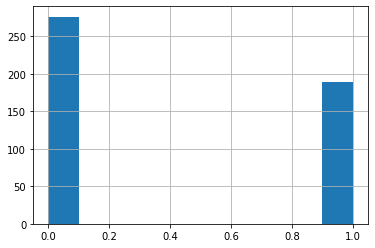

In [ ]:
title_data['2_way_label'].hist()

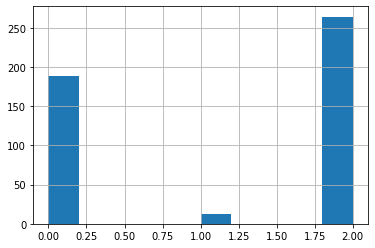

In [ ]:
title_data['3_way_label'].hist()

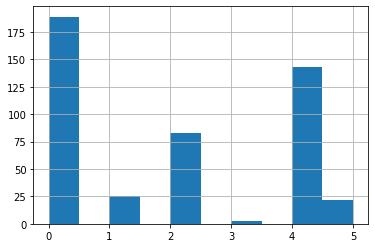

In [ ]:
title_data['6_way_label'].hist()

In [ ]:
title_data.columns

Index(['clean_title', '2_way_label', '3_way_label', '6_way_label'], dtype='object')

In [ ]:
title_data.describe()

2_way_label  3_way_label  6_way_label
count   465.000000   465.000000   465.000000
mean      0.406452     1.161290     1.896774
std       0.491700     0.974794     1.827145
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     2.000000     2.000000
75%       1.000000     2.000000     4.000000
max       1.000000     2.000000     5.000000

In [ ]:
title_texts = title_data['clean_title']
title_labels = title_data[['2_way_label', '3_way_label', '6_way_label']]

In [ ]:
for i in range(10):
  index_val = randint(0,465)
  print('Title:', title_texts[index_val])
  print('2 way Label: ', map_2[title_labels['2_way_label'][index_val]])
  print('3 way Label: ', map_3[title_labels['3_way_label'][index_val]])
  print('6 way Label: ', map_6[title_labels['6_way_label'][index_val]])
  print('-'*50)

Title: measuring a staggering feet tall andre roussimoff or andre the giant holds a young lady while basking at a beach in cannes france in
2 way Label:  True
3 way Label:  True
6 way Label:  True
--------------------------------------------------
Title: space bird
2 way Label:  Fake
3 way Label:  Fake with False Text
6 way Label:  False Connection
--------------------------------------------------
Title: i see it too
2 way Label:  Fake
3 way Label:  Fake with False Text
6 way Label:  False Connection
--------------------------------------------------
Title: in my head this thing is belting like an opera singer
2 way Label:  Fake
3 way Label:  Fake with False Text
6 way Label:  Misleading Content
--------------------------------------------------
Title: at least she fits
2 way Label:  Fake
3 way Label:  Fake with False Text
6 way Label:  False Connection
--------------------------------------------------
Title: the queen reported to west yorkshire police for not wearing seat belt
2 way

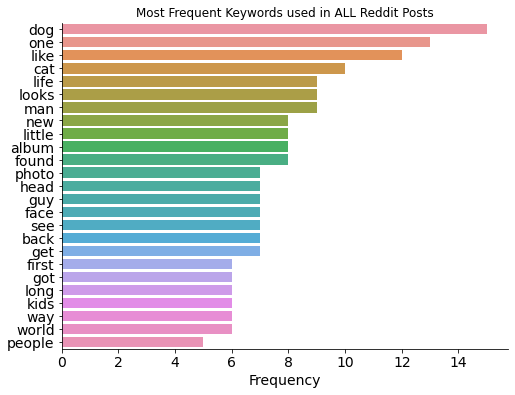

In [ ]:
stpwrds = stopwords.words('english')
punctuation = string.punctuation

num_words = 25

text = " ".join(title_texts)

text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in ALL Reddit Posts");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

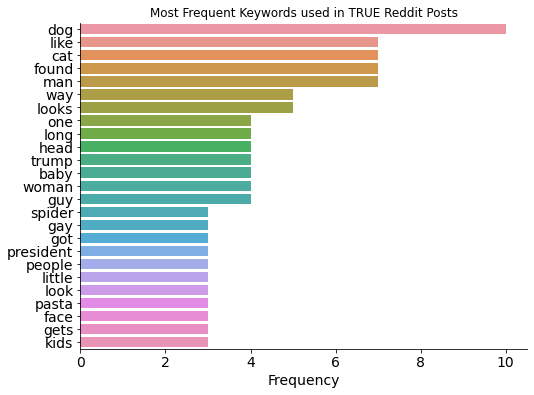

In [ ]:
stpwrds = stopwords.words('english')
punctuation = string.punctuation

num_words = 25

text = " ".join(title_texts[title_data['2_way_label']==1])

text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in TRUE Reddit Posts");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

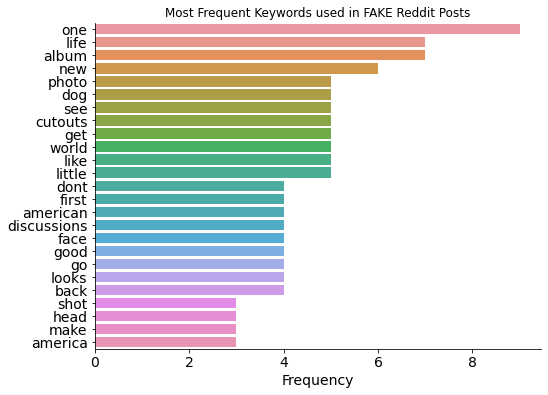

In [ ]:
stpwrds = stopwords.words('english')
punctuation = string.punctuation

num_words = 25

text = " ".join(title_texts[title_data['2_way_label']==0])

text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in FAKE Reddit Posts");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

In [ ]:
def process_lang_data(text):
  '''Tokenize the text, remove stopwards, go through lemmatization, and remove punctuation'''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  for token in word_tokenize(text):
    if token not in punctuation and token not in our_stopwords:
      clipped_token = lemmatizer.lemmatize(token)
      cleaned_text.append(clipped_token)

  return cleaned_text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # 1000 to 250

bow.fit(title_texts) # fitting to our training data

bow_transformed = bow.transform(title_texts).toarray() # then transforming both training and testing data

In [ ]:
vocab = bow.vocabulary_

In [ ]:
vocab_data = pd.DataFrame({
    'word': vocab.keys(),
    'value': vocab.values()
})

In [ ]:
vocab_data.head()

word  value
0   sweet    782
1  spider    718
2  statue    739
3      de    157
4    dont    181

In [ ]:
vocab_data.sort_values(by=['value']).head()

word  value
327     abandoned      0
490  accidentally      1
606      actually      2
344           air      3
136         album      4

In [ ]:
bow_transformed.shape

(465, 1000)

In [ ]:
def lookup_key(item):
  maped_values = []
  for value in np.where(np.array(item) == 1)[0]:
    maped_values.append(vocab_data._get_value(vocab_data[vocab_data['value'] == value].index[0], 'word'))
  return maped_values

In [ ]:
vector_text_df = title_data.copy()

In [ ]:
vector_text_df

clean_title  2_way_label  \
0                 sweet spider statue in des moines ia            1   
1            why dont you take a photo it lasts longer            0   
2                i was wondering what would beak first            0   
3      lt george h w bush is shot down by the japanese            0   
5    life heartwarming this mother claimed her son ...            0   
..                                                 ...          ...   
516  mom to the rescue dog saves her puppies from d...            1   
517              this shop sells middle finger bottles            1   
518                                      sit in my lap            0   
519                       fuck u baby china number one            0   
520                        blarts got a brand new ride            0   

     3_way_label  6_way_label  
0              0            0  
1              2            4  
2              2            4  
3              2            2  
5              2            1  
..           ...          ...  
516            0            0  
517            0            0  
518            2            2  
519            2            4  
520            2            4  

[465 rows x 4 columns]

In [ ]:
def convert_to_str(lst): 
    return ' '.join(map(str, lst))

new_vector = []
for i in bow_transformed:
  new_vector.append(convert_to_str(i))


In [ ]:
vector_text_df.insert(1, 'vector',new_vector, True)
vector_text_df.head()

clean_title  \
0               sweet spider statue in des moines ia   
1          why dont you take a photo it lasts longer   
2              i was wondering what would beak first   
3    lt george h w bush is shot down by the japanese   
5  life heartwarming this mother claimed her son ...   

                                              vector  2_way_label  \
0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...            1   
1  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...            0   
2  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...            0   
3  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...            0   
5  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...            0   

   3_way_label  6_way_label  
0            0            0  
1            2            4  
2            2            4  
3            2            2  
5            2            1

In [ ]:
def convert_to_list(input_val):
  return np.array([int(num) for num in input_val.split()])

def read_whole_text(index):
  words = lookup_key(convert_to_list(vector_text_df.iloc[[index]]['vector'].values[0]))
  print('Index:',index)
  print('Title:', vector_text_df.iloc[[index]]['clean_title'].values[0])
  print('Vectorized Words:', words)
  print('2 way Label:', map_2[ vector_text_df.iloc[[index]]['2_way_label'].values[0] ] )
  print('3 way Label:', map_3[ vector_text_df.iloc[[index]]['3_way_label'].values[0] ] )
  print('6 way Label:', map_6[ vector_text_df.iloc[[index]]['6_way_label'].values[0] ] )

In [ ]:
for i in range(10):
  read_whole_text(randint(0,465))
  print('-'*50)

Index: 79
Title: dont feed them after midnight
Vectorized Words: ['dont', 'feed']
2 way Label: Fake
3 way Label: Fake with False Text
6 way Label: False Connection
--------------------------------------------------
Index: 59
Title: this slightly ironic signage at wendys
Vectorized Words: ['signage', 'slightly', 'wendys']
2 way Label: True
3 way Label: True
6 way Label: True
--------------------------------------------------
Index: 275
Title: available here
Vectorized Words: ['available']
2 way Label: Fake
3 way Label: Fake with False Text
6 way Label: False Connection
--------------------------------------------------
Index: 105
Title: cutouts
Vectorized Words: ['cutout']
2 way Label: Fake
3 way Label: Fake with False Text
6 way Label: False Connection
--------------------------------------------------
Index: 76
Title: alka seltzer dissolving under ultra violet light
Vectorized Words: ['dissolving', 'light', 'seltzer', 'ultra', 'violet']
2 way Label: Fake
3 way Label: Fake with False T

# Image Visualization

Reloading data because null values were removed from labels but not image_data. Using the previously modified labels would not match up with the images

In [ ]:
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/images.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/labels.csv"
image_data = np.load('images.npy',allow_pickle=True)
labels = pd.read_csv('labels.csv')

images.npy.1        100%[===================>]   1.06G   164MB/s    in 8.0s    
labels.csv.1        100%[===================>]  74.51K  --.-KB/s    in 0.002s  


In [ ]:
labels.columns

Index(['Unnamed: 0', 'author', 'clean_title', 'created_utc', 'domain',
       'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio',
       '2_way_label', '3_way_label', '6_way_label'],
      dtype='object')

In [ ]:
map_2

['Fake', 'True']

In [ ]:
labels['2_way_label']==0 # Fake news

0      False
1       True
2       True
3       True
4       True
       ...  
516    False
517    False
518     True
519     True
520     True
Name: 2_way_label, Length: 521, dtype: bool

## Random Cycling

Index: 278
Title: jacks on the road again
2 Way Label: Fake
3 Way Label: Fake with False Text
6 Way Label: Satire


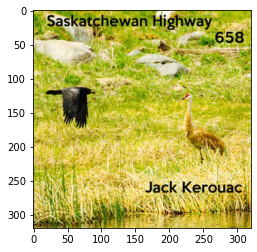

In [ ]:
index_val = randint(0,521)

plt.imshow(image_data[index_val])

print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 Way Label:', map_2[ labels['2_way_label'][index_val]] )
print('3 Way Label:', map_3[ labels['3_way_label'][index_val]] )
print('6 Way Label:', map_6[ labels['6_way_label'][index_val]] )

**saturated image** with *text labels*

Index: 314
Title: the unspeakably disgusting way stanley kubrick created a space odysseys trippiest scene
2 Way Label: Fake
3 Way Label: Fake with False Text
6 Way Label: Imposter Cotent


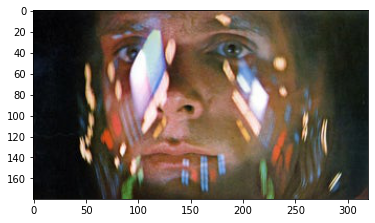

In [ ]:
index_val = randint(0,521)

plt.imshow(image_data[index_val])

print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 Way Label:', map_2[ labels['2_way_label'][index_val]] )
print('3 Way Label:', map_3[ labels['3_way_label'][index_val]] )
print('6 Way Label:', map_6[ labels['6_way_label'][index_val]] )

**strange effects** and *bright colors*

Index: 501
Title: this rock that looks like a dog
2 Way Label: Fake
3 Way Label: Fake with False Text
6 Way Label: Misleading Content


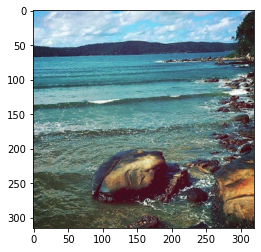

In [ ]:
index_val = randint(0,521)

plt.imshow(image_data[index_val])

print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 Way Label:', map_2[ labels['2_way_label'][index_val]] )
print('3 Way Label:', map_3[ labels['3_way_label'][index_val]] )
print('6 Way Label:', map_6[ labels['6_way_label'][index_val]] )

**odd saturation setting**

Index: 155
Title: master splinter
2 Way Label: Fake
3 Way Label: Fake with False Text
6 Way Label: Misleading Content


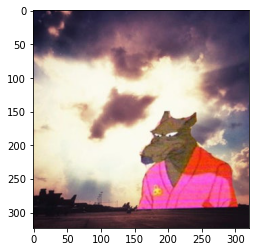

In [ ]:
index_val = randint(0,521)

plt.imshow(image_data[index_val])

print('Index:', index_val)
print('Title:', labels['clean_title'][index_val])
print('2 Way Label:', map_2[ labels['2_way_label'][index_val]] )
print('3 Way Label:', map_3[ labels['3_way_label'][index_val]] )
print('6 Way Label:', map_6[ labels['6_way_label'][index_val]] )

**bright colors** with an overlayed *photoshoped image*

## 2 Way Label

In [ ]:
map_2

['Fake', 'True']

In [ ]:
labels.index[labels['2_way_label']==0].tolist()[23:28] # label = fake

[38, 39, 41, 42, 43]

<Figure size 432x288 with 0 Axes>

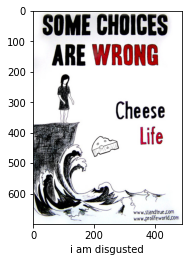

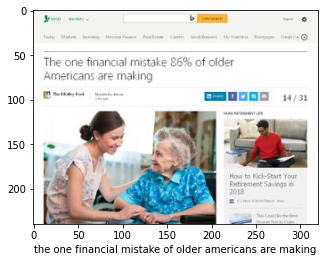

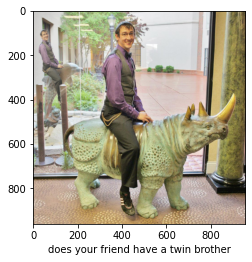

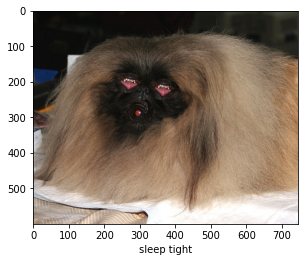

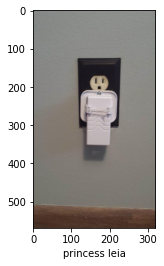

In [ ]:
for i in [38, 39, 41, 42, 43]:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

In [ ]:
labels.index[labels['2_way_label']==1].tolist()[23:28] # label = true

[60, 61, 62, 63, 69]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


<Figure size 432x288 with 0 Axes>

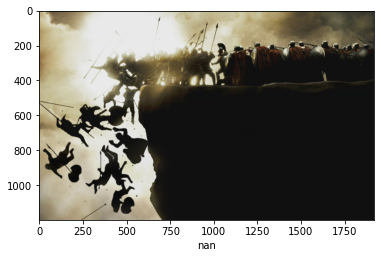

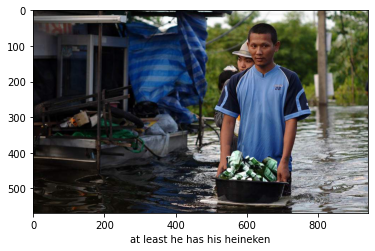

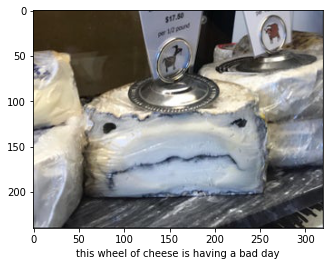

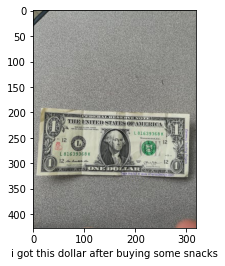

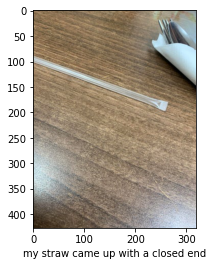

In [ ]:
for i in [11, 12, 13, 14, 15]:
  plt.tight_layout(pad=10.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

**Label = 0**: 
- images are brighter
- images contain text
- images contain brighter colors

**Label = 1**:
- images are *stock photos*

## 3 Way Label

In [ ]:
map_3

['True', 'Fake with True Text', 'Fake with False Text']

In [ ]:
labels.index[labels['3_way_label']==0].tolist()[19:26] # label = true (already examined)

[49, 50, 56, 57, 60, 61, 62]

<Figure size 432x288 with 0 Axes>

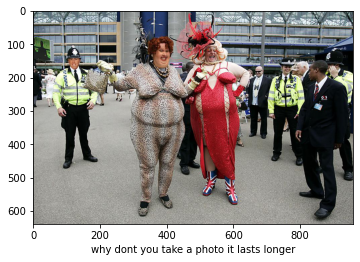

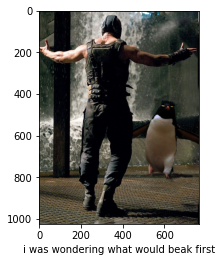

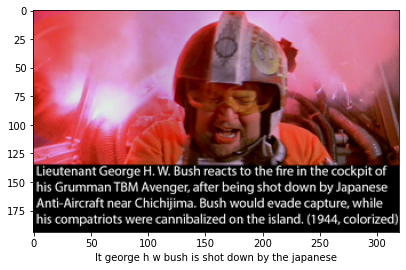

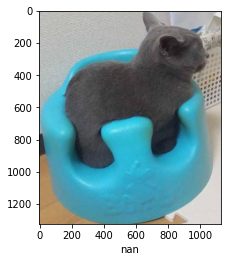

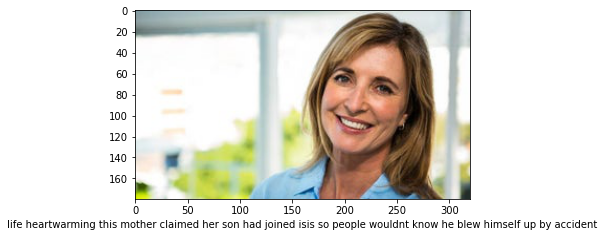

In [ ]:
for i in [1, 2, 3, 4, 5]:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

In [ ]:
labels.index[labels['3_way_label']==1].tolist() # label = Fake with True Text

[30, 36, 93, 125, 228, 232, 238, 370, 407, 465, 487, 495]

<Figure size 432x288 with 0 Axes>

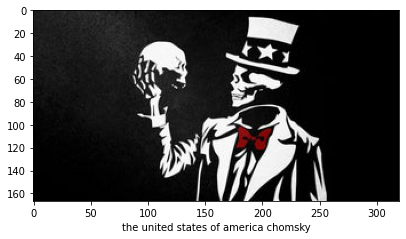

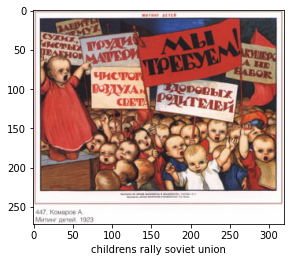

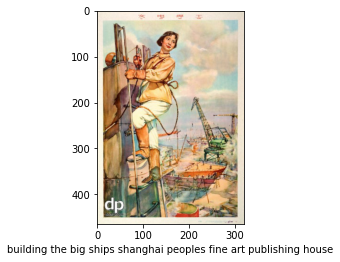

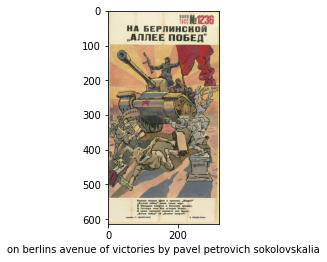

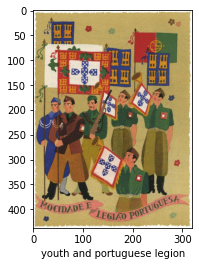

In [ ]:
for i in [30, 36, 93, 125, 228]:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

In [ ]:
labels.index[labels['3_way_label']==2].tolist()[246:251] # label = Fake with Fake Text

[399, 400, 401, 402, 403]

<Figure size 432x288 with 0 Axes>

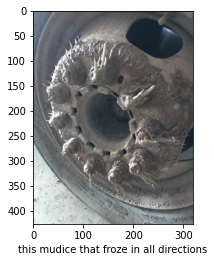

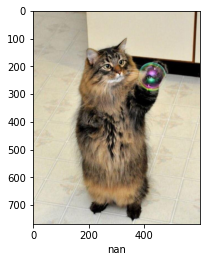

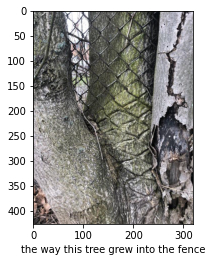

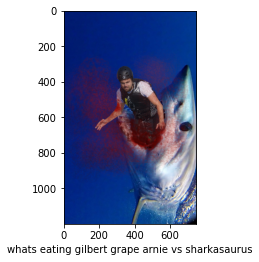

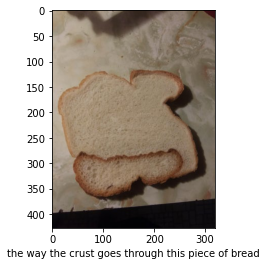

In [ ]:
for i in [300, 301, 302, 303, 304]:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

**label = 0**:
- standard true images

**label = 1**:
- political art
- cartoon art style
- dull colors

**label = 2**:
- no direct pattern

## 6 Way Label

In [ ]:
map_6

['True',
 'Satire',
 'Misleading Content',
 'Manipulated Content',
 'False Connection',
 'Imposter Cotent']

<Figure size 432x288 with 0 Axes>

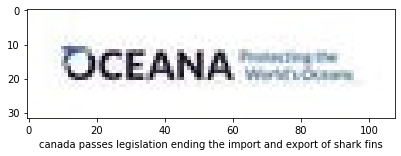

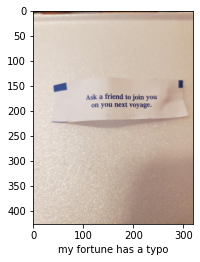

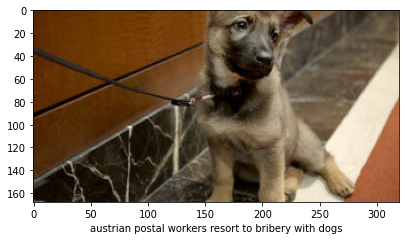

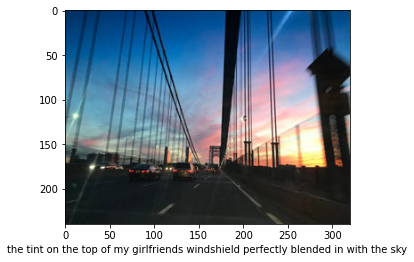

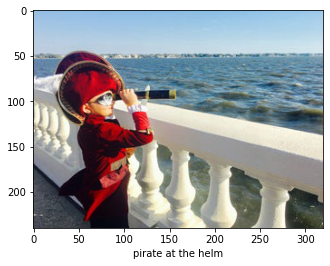

In [ ]:
imgs = labels.index[labels['6_way_label']==0].tolist()[55:60] # label = true (already examined)
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

<Figure size 432x288 with 0 Axes>

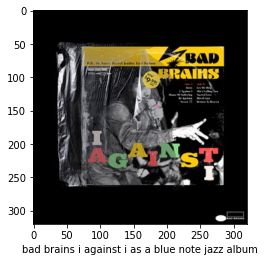

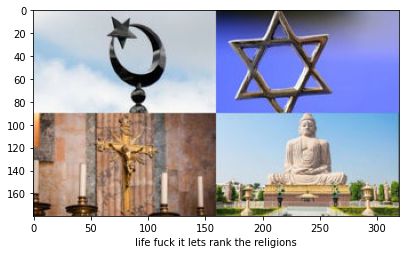

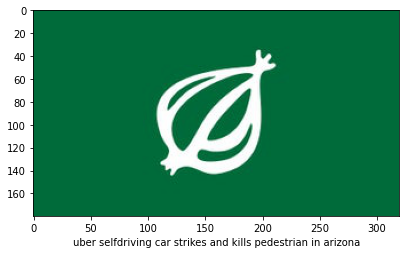

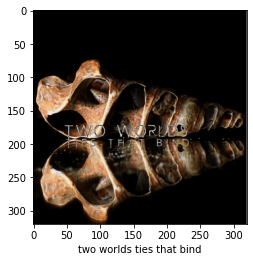

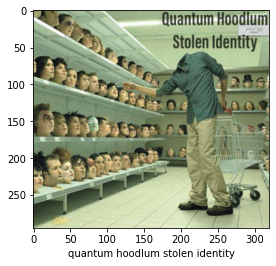

In [ ]:
imgs = labels.index[labels['6_way_label']==1].tolist()[1:6] # label = satire
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

<Figure size 432x288 with 0 Axes>

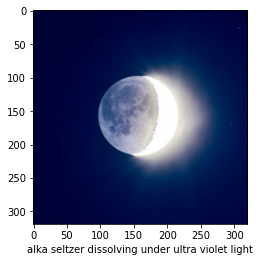

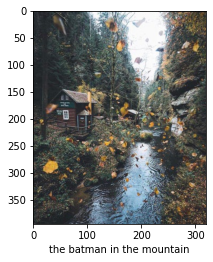

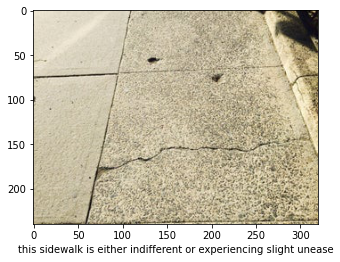

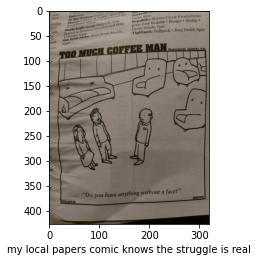

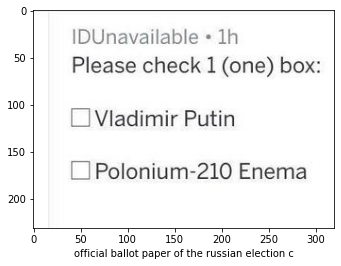

In [ ]:
imgs = labels.index[labels['6_way_label']==2].tolist()[10:15] # label = misleading content
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

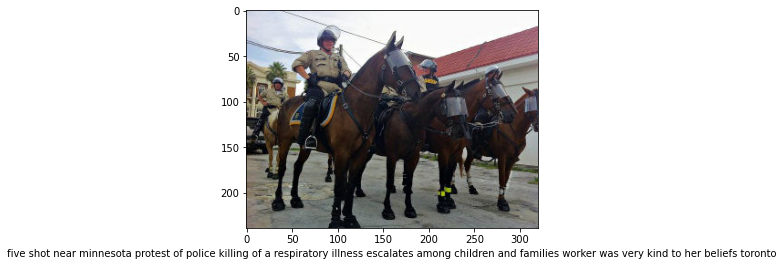

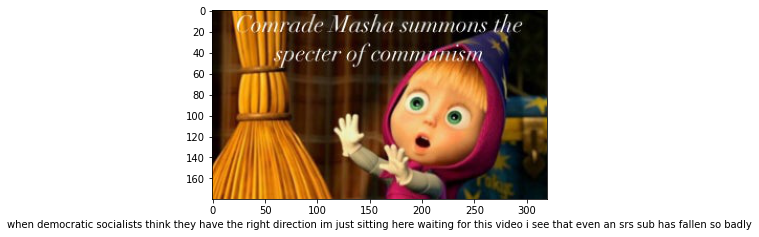

In [ ]:
imgs = labels.index[labels['6_way_label']==3].tolist()[1:6] # label = manipulated content
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

<Figure size 432x288 with 0 Axes>

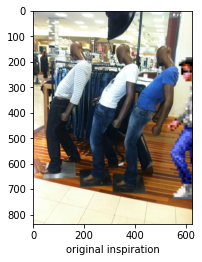

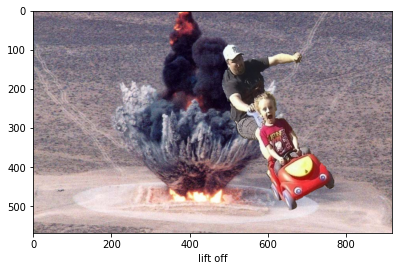

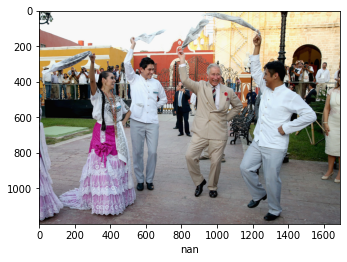

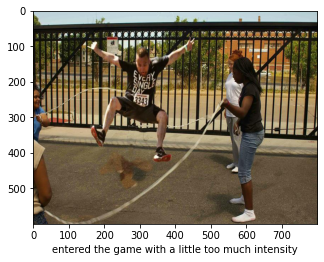

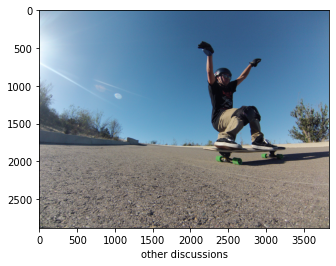

In [ ]:
imgs = labels.index[labels['6_way_label']==4].tolist()[99:104] # label = false connection
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

# No label=4 in smaller dataset

<Figure size 432x288 with 0 Axes>

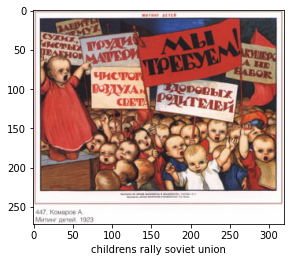

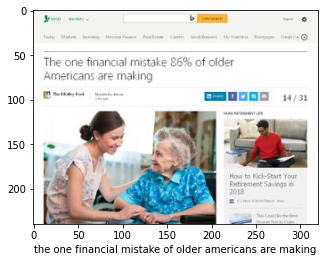

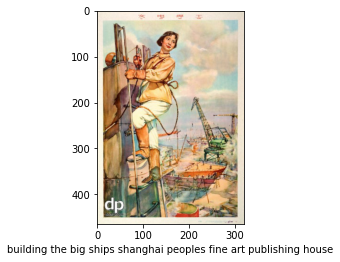

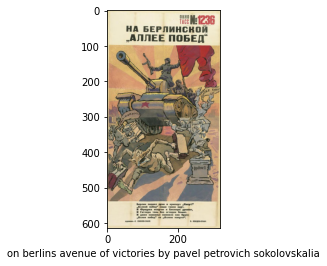

In [ ]:
imgs = labels.index[labels['6_way_label']==5].tolist()[1:5] # label = imposter content
for i in imgs:
  plt.tight_layout(pad=2.0)
  plt.figure()
  plt.imshow(image_data[i])
  plt.xlabel(labels['clean_title'][i])

# No label=4 in smaller dataset

**label = 0:**
- standard *true* content

**label = 1:**
- contains symbols

**label = 2:**
- no relation (but one of them was a *screenshot*)

**label = 3:**
- no relation

**label = 4:**
- people are seen performing actions

**label = 5:**
- political art (same as previous label map)